![Risk](img/Risk.png)

## Assignment 5: Risk

The program should simulate 1000 individual battle rounds in Risk (3 attackers vs 2 defender) and plot the result.

For extra marks: a more complicated version that simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out.

### Rules of Risk

In Risk one army fights another using 6 sided dice.

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

Each side loses troops depending on the following rules:

1. The two top dice are compared (i.e. the attackers top dice roll with the defenders top dice roll).
    If the attackers dice is the same or lower they lose one troop otherwise the defender loses a troop (i.e. if the attackers dice is higher).
2. The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest).
    If the attackers dice is the same or lower they lose one troop otherwise the defender loses a troop (i.e. if the attackers dice is higher).

Author: Irene Kilgannon

In [12]:
# Import modules
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

# Import custom module
from risk import *

In [13]:
plt.style.use('seaborn-v0_8')

A number of functions were created to simulate the game of Risk. These are in the risk.py module.

- roll_dice(num_dice)

    A function to simulate the rolling of any number of dice and return a sorted list of the values generated. For this [randint from the random module](https://www.geeksforgeeks.org/python-randint-function/) was used. The syntax is random.randint(start, end), where the start and end values are _included_. It is also possible to generate random numbers with [NumPy's randint](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.randint.html). It has a similar syntax np.random.randint(start, end) but with a significant difference. With NumPy's randint function the end point is _excluded_.

    The lists were sorted with the [sorted function](https://www.w3schools.com/python/ref_func_sorted.asp). By default this function sorts lists in ascending order however using the reverse parameter, with reverse = True the list will be sorted in descending order. As the dice values rolled for the attacker and defender are compared in descending order, sorting the lists in descending order is important.
    
- calculate_losses(attacker_dice, defender_dice)

    This function compares the dice values of the attacker and the defender for each round of the game. The top values in the attacker and defender lists are compared and then the second values in the lists are compared. As the attacker list will be longer than the defender list, the defender list will decide the length of the new iterator. As [w3schools](https://www.w3schools.com/python/ref_func_zip.asp) states "if the passed iterables have different lengths, the iterable with the least items decides the length of the new iterator". https://realpython.com/python-zip-function/.
    
    The [zip function](https://www.w3schools.com/python/ref_func_zip.asp) zips the attacker and defender lists together and returns a zip object. The zip object is an iterator of tuples, a and d, where a is the value of the dice in the attacker list and d is the dice value in the defender list. 
    
    For the game the losses for each round are tracked with the variables, round_attacker_losses and round_defender_losses. If the value of a in the attacker list is less than or equal to the value of d in the defender list, round_attacker_losses will be increased by one. Otherwise, the round_defender_losses is increased by one. 
    
- simulate_battle(num_rounds)

    This function simulates a battle. 
    
    Two counters will keep track of the overall losses for the attacker, total_attacker_losses and the defender, total_defender_losses. 
    
    Round_scores is instantiated as an empty list. Round_scores will contain information on each round of the battle. Each round is stored as a dictionary, with key:value pairs. It will contain the dice values rolled for the attacker and the defender and the losses, round_attacker_losses and round_defender_losses for each round. 

    The assignment set the number of rounds to 1000, but the function is designed that the number of rounds can be varied with the num_rounds argument. For each round roll_dice will create the rolled dice lists for the attacker, attacker_dice and defender, defender_dice. 
    
    Calculate_losses takes these dice lists as an argument, compares the values and returns round_attacker_losses and round_defender_losses. These will be appended to round_scores along with the round number and attacker_dice and defender_dice. Simulate_battle adds the results of the calculate_losses function to the total_losses counter for both the attacker and defender. 

- plot_results(attacker_losses, defender_losses)

    Takes the values from the total_attacker_losses and total_defender_losses and outputs a bar plot of the result the overall losses for both. 
    
- score_frequency(rounds_score)

    The possible scores for the attacker losses vs defender losses are:
        Attacker Losses 2, Defender Losses 0
        Attacker Losses 1, Defender Losses 1
        Attacker Losses 0, Defender Losses 2
    This function will create a plot of the above based on the 'rounds_attacker_losses' column of the rounds_score dataframe.

This [realpython blog](https://realpython.com/python-return-statement/#returning-multiple-values) explains how to return multiple values from a function. Iterable unpacking allows access to the variables that are used or created by the function. To access the variables in the simulate_battle() they need to be unpacked.

In [14]:
# Simulate 1000 rounds of the battle
# Iterable unpack the return values of the simulate_battle function
attacker_dice, defender_dice, total_attacker_losses, total_defender_losses, round_scores = simulate_battle(1000)

The defender lost the battle.
 Attackers Losses: 912
 Defenders Losses: 1088


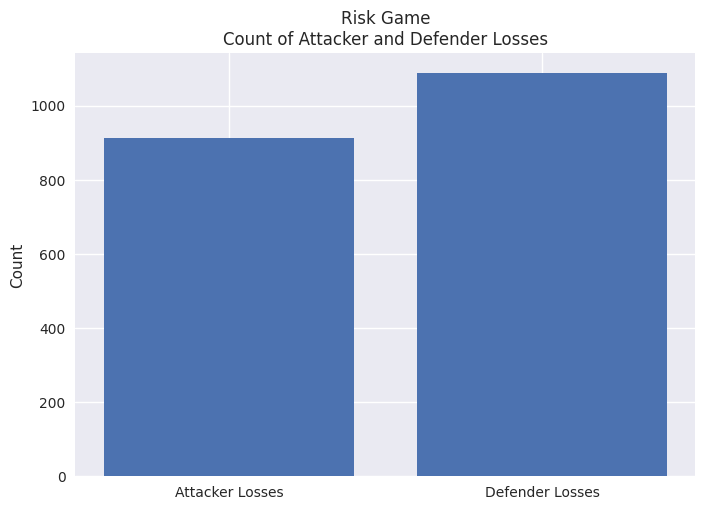

In [15]:
# Display the results after 1000 rounds of Risk.
plot_results(total_attacker_losses, total_defender_losses)

Converting the values in the rounds_scores list of dictionaries to a dataframe made it easier to check that the code functions as it should. It also makes it easier to plot the results of the battle. It would also make it possible to calculate other statistics that are not required for this assignment e.g. the number of times the number six was rolled.

In [16]:
# Convert round_scores to a dataframe
round_scores = pd.DataFrame(round_scores).set_index('round')
round_scores.head()

,attacker_dice,defender_dice,round_attacker_losses,round_defender_losses
round,,,,
1,"[3, 1, 1]","[4, 2]",2,0
2,"[5, 3, 3]","[5, 5]",2,0
3,"[4, 4, 1]","[6, 3]",1,1
4,"[6, 5, 5]","[5, 2]",0,2
5,"[5, 3, 2]","[5, 1]",1,1


round_attacker_losses
0    384
1    320
2    296
Name: count, dtype: int64


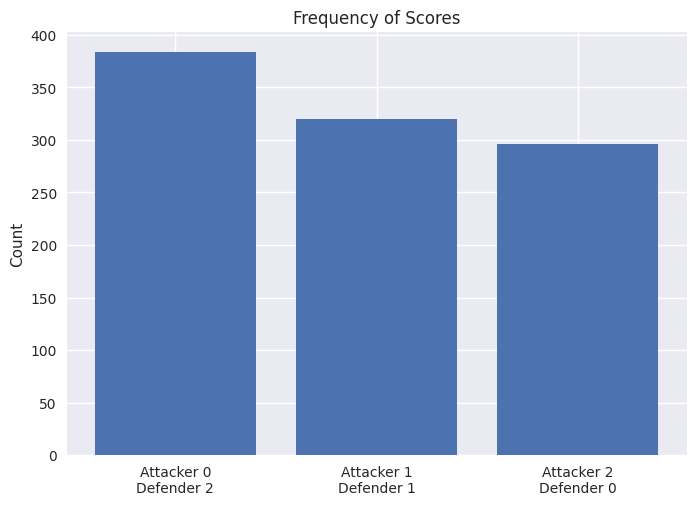

In [17]:
# Plot the frequency of possible scores
score_frequency(round_scores)

### Extra marks

A more complicated version that simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out.

Many of the same functions used for the simpler version of the game are required for this version such as roll_dice, plot_results() and score_frequency().

One new function was created, army_size(). 

The calculate_losses() and simulate_battle() functions were modified to take army size into account. 

- army_size()

    The size of the army was a decided by the random module. The army size could be any integer between 1 and 1000. At the start of the game the attacker and defender armies are the same size. 

- army_calculate_losses(attacker_dice, defender_dice, attacker_army_size, defender_army_size)

    This function is similar to the calculate_losses function used for the simpler game. It differs in that it reduces the size of the losing army by one every time it loses an individual battle in the dice comparison round. 

- army_simulate_battle(num_rounds)
    
    The number of rounds for the game is 1000 but the game could finish sooner if either the attacker or the defender has no army left. 

In [18]:
# Simulate battle
attacker_dice, defender_dice, total_attacker_losses, total_defender_losses, round_scores, attacker_army_size, defender_army_size = army_simulate_battle(1000)

The size of the attacker army  at start of game: 445
The size of the defender army at start of game: 445



The defender lost the battle.
 Attackers Losses: 353
 Defenders Losses: 445


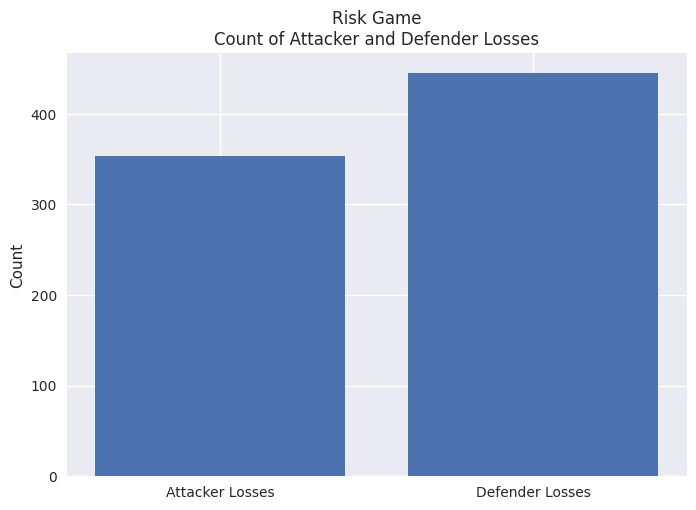

In [19]:
# Plot the attacker losses
plot_results(total_attacker_losses, total_defender_losses)

In [20]:
round_scores = pd.DataFrame(round_scores).set_index('round')
round_scores.head()

,attacker_dice,defender_dice,round_attacker_losses,round_defender_losses,attacker_army_size,defender_army_size
round,,,,,,
1,"[5, 4, 4]","[2, 1]",0,2,445,443
2,"[5, 4, 2]","[4, 2]",0,2,445,441
3,"[4, 1, 1]","[1, 1]",1,1,444,440
4,"[3, 1, 1]","[4, 2]",2,0,442,440
5,"[5, 1, 1]","[6, 4]",2,0,440,440


round_attacker_losses
0    157
1    131
2    111
Name: count, dtype: int64


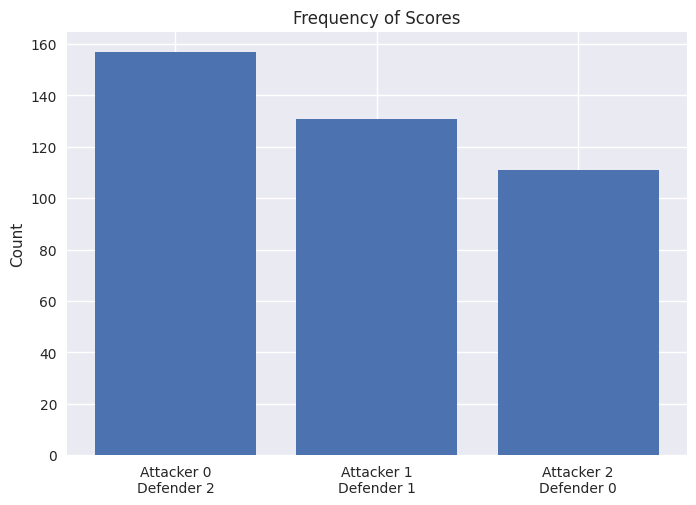

In [21]:
score_frequency(round_scores)

It took 399 rounds to complete the game.


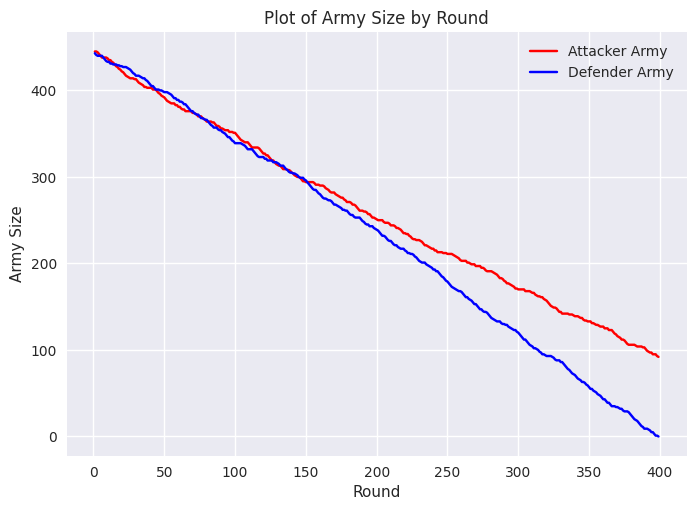

In [22]:
plot_army(round_scores)

__References__





 https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html

 Sort vs sorted https://www.w3schools.com/python/numpy/numpy_array_sort.asp Sort returns a copy leaving the original untouched.
 
 https://stackoverflow.com/questions/26984414/efficiently-sorting-a-numpy-array-in-descending-order

End 

***